In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_tic = pd.read_csv('../../data/titanic/train.csv')
train_tic
# Survived의 0이 사망, 1이 생존

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_tic = pd.read_csv('../../data/titanic/test.csv')
test_tic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic = pd.read_csv('../../data/titanic/gender_submission.csv')
titanic

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 데이터 시각화

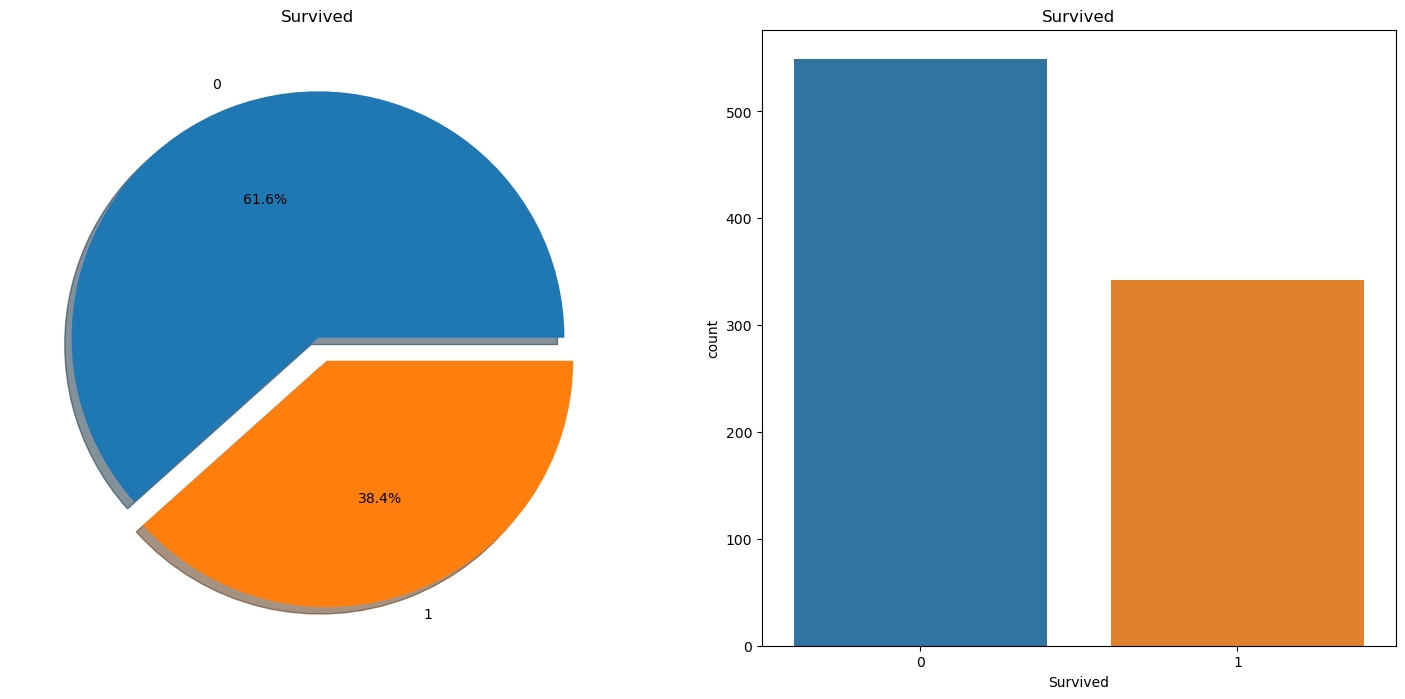

In [5]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
train_tic['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')


sns.countplot(data=train_tic,x= 'Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 탑승객의 61프로 사망

<Axes: >

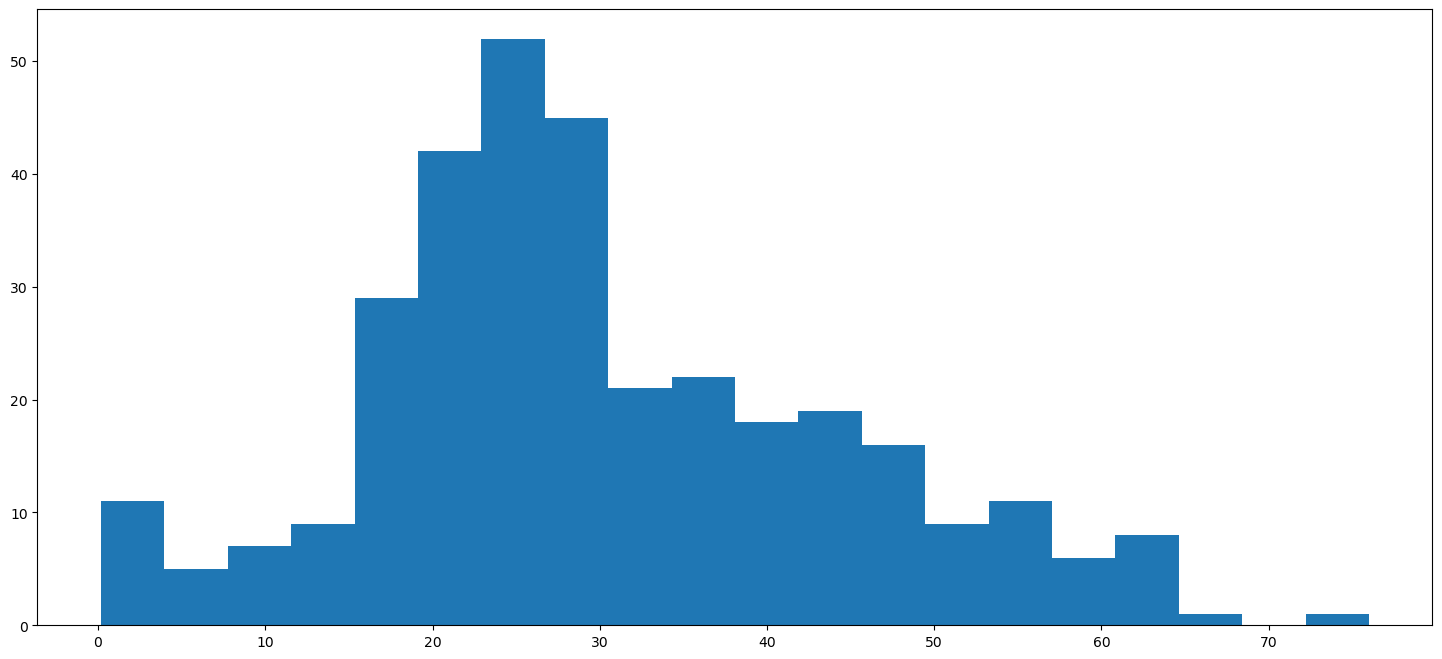

In [6]:
test_tic['Age'].hist(bins=20,figsize=(18,8),grid=False)

Text(0.5, 1.0, 'Survived (female)')

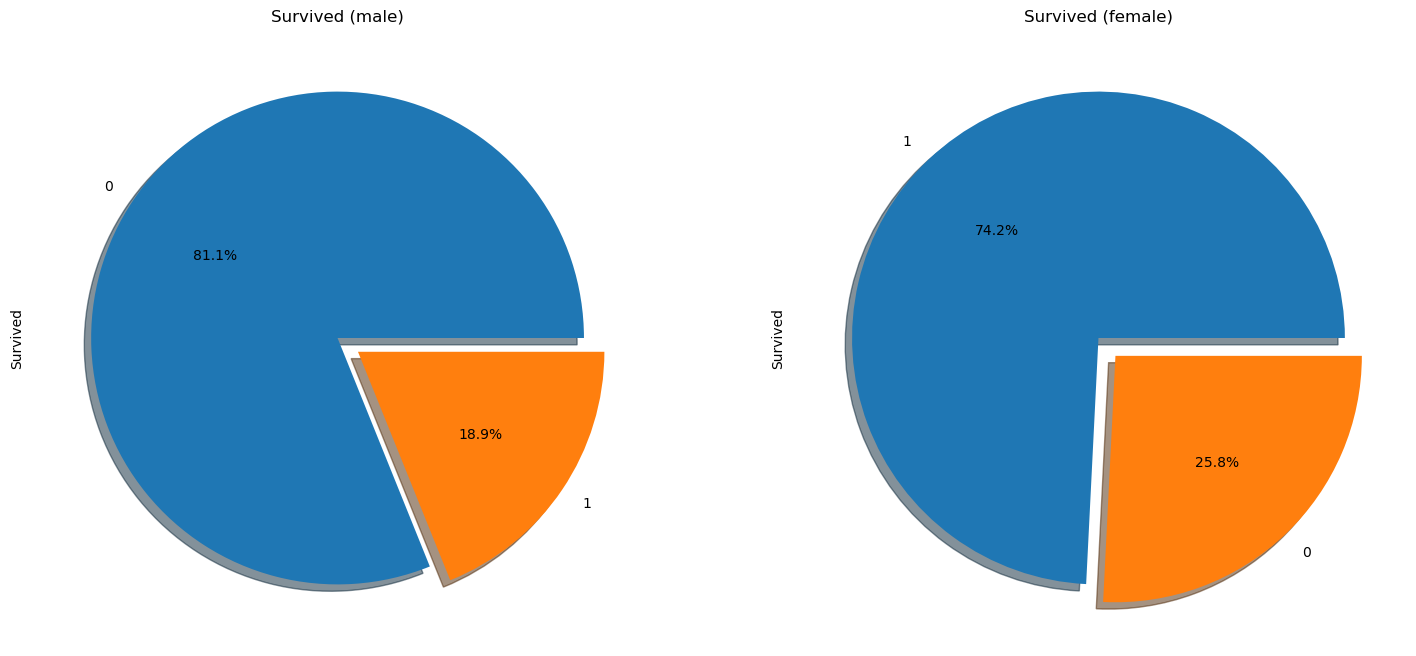

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_tic['Survived'][train_tic['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_tic['Survived'][train_tic['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

# 남성의 81프로, 여성의 74프로 사망

In [8]:
train_tic.groupby('Pclass').mean()
# 등급이 많을수록 연령대가 높음

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8468\2809190860.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_tic.groupby('Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [9]:
train_tic.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8468\348441119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_tic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


C:\Users\Playdata\AppData\Local\Temp\ipykernel_8468\518636925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_tic.corr(), linewidths=0.01, square=True,


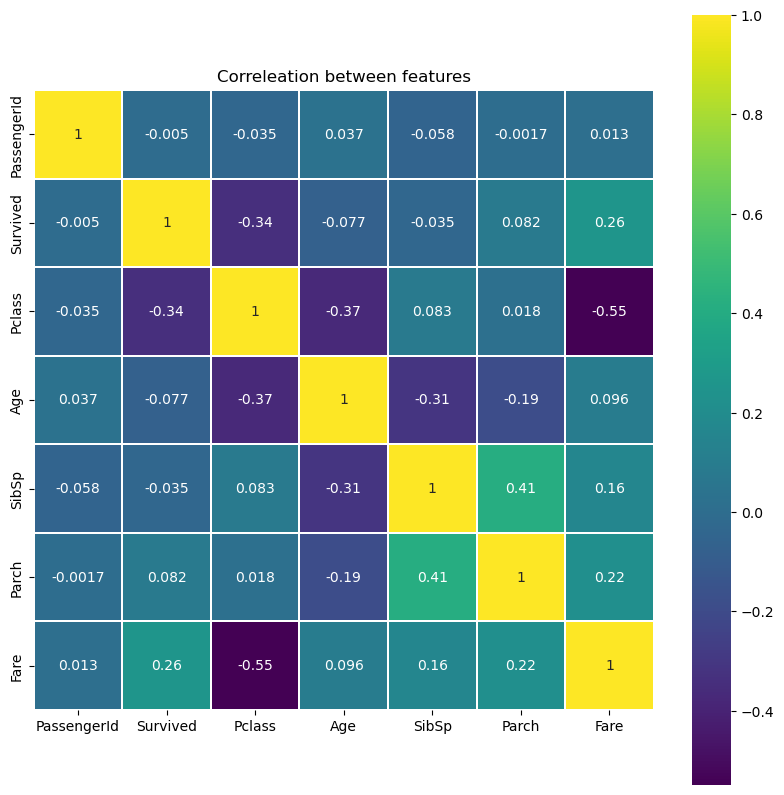

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(train_tic.corr(), linewidths=0.01, square=True,
           annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correleation between features')
plt.show()

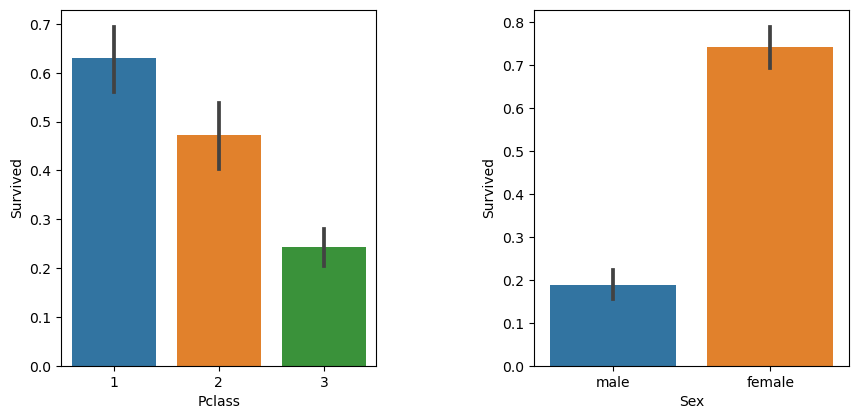

In [11]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot(data=train_tic, x='Pclass',y='Survived')

plt.subplot(132)
sns.barplot(data=train_tic, x='Sex',y='Survived')

plt.subplots_adjust(top=1,left=0.10, right=1, hspace=0.5,wspace=0.5)
plt.show()

# 등급이 높고, 어린아이, 여성이 생존률이 높음

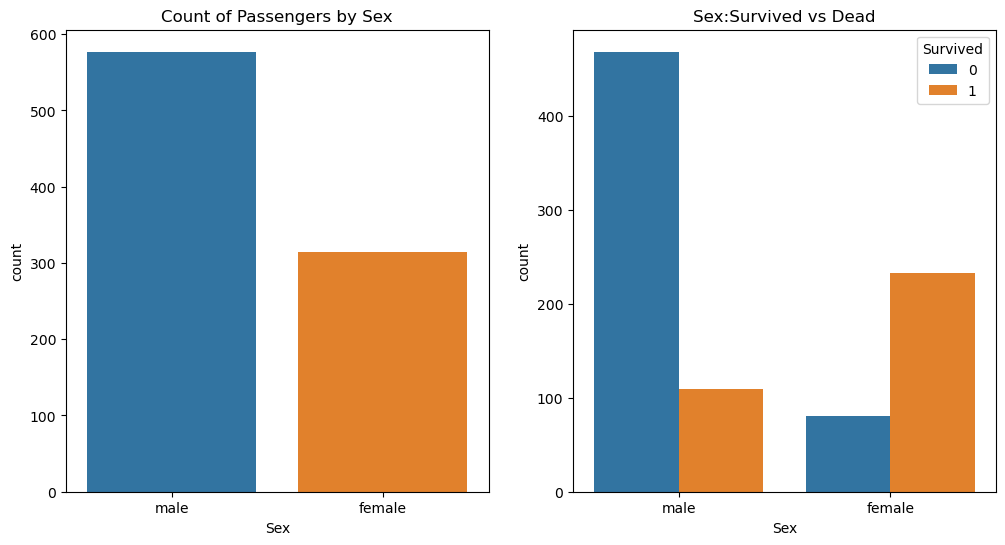

In [12]:
f,ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=train_tic, x='Sex',ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(data=train_tic, x='Sex',hue='Survived',ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

# 탑승객 수는 남성이 더 많고
# 사망자수 비율도 남성이 더 높음

Text(0.5, 1.0, 'Male-Female Split for Embarked')

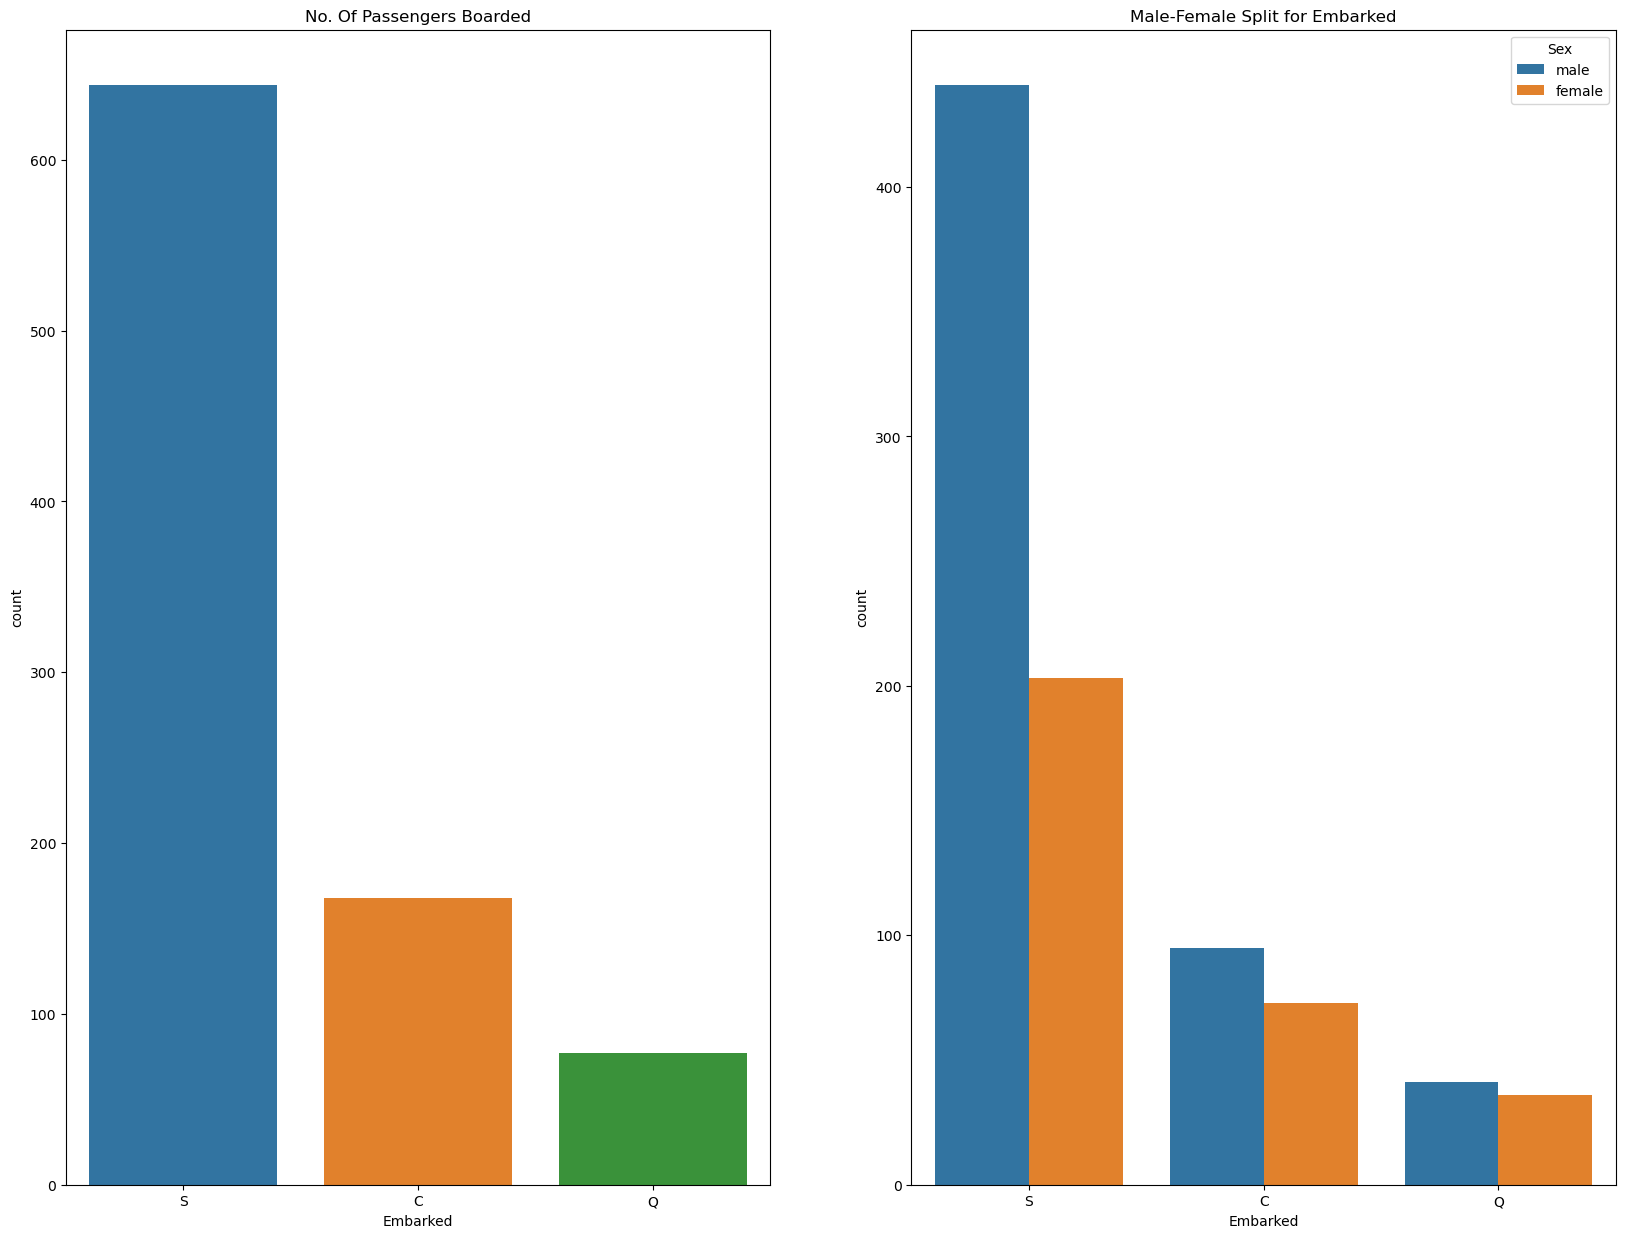

In [13]:
# Embarked : 승선한 항
# C = Cherbourg
# Q = Queenstown
# S = Southampton
f, ax = plt.subplots(1, 2, figsize=(20,15))
sns.countplot(data=train_tic,x='Embarked',ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')
sns.countplot(data=train_tic,x = 'Embarked',hue='Sex',ax=ax[1])
ax[1].set_title('Male-Female Split for Embarked')

# 각 항에 탑승한 승객의 수. S에서 가장 많이 탑승하였고, 모든 항구에서 남성들의 탑승비율이 더 높음

## 데이터 전처리

In [14]:
train_tic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 사용하지 않을 변수 제거(ticket, cabin)

In [15]:
train_tic = train_tic.drop(['Ticket','Cabin'],axis=1)
test_tic = test_tic.drop(['Ticket','Cabin'],axis=1)

### 탑승객들 이름 통일하기

In [16]:
combine = [train_tic,test_tic]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    

pd.crosstab(train_tic['Title'],train_tic['Sex'])

# female에서는 miss mrs, male 에서는 master mr

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
# female에서는 Miss와 Mrs가, male에서는 Master와 Mr가 두드러지게 나타남
# (Mlle와 Ms 는 Miss의, Ms는 Mrs의 불어식 표현)
# 나머지를 Rare

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_tic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Title 변수를 숫자형으로

In [18]:
title_mapping={"Mr":1, "Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_tic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### name과 passengerId 삭제

In [19]:
# name, passengerid 삭제

train_tic = train_tic.drop(['Name', 'PassengerId'], axis=1)
test_tic = test_tic.drop(['Name'],axis=1)
combine = [train_tic, test_tic]
train_tic.shape, test_tic.shape

((891, 9), (418, 9))

### Sex 변수를 숫자 범주형 변수로 변환

In [20]:
# sex 변수를 숫자 범주형 변수로
# tmp=[]
# for each in train_tic['Sex']:
#     if each=='female':
#         tmp.append(1)
#     elif each == 'male':
#         tmp.append(0)
#     else:
#         tmp.append(np.nan)
        
# train_tic['Sex'] = tmp

for dataset in combine:
    print(dataset['Sex'])
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_tic.head()

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [21]:
train_tic['Sex'].isnull().sum()

0

### Age의 결측값 채우기

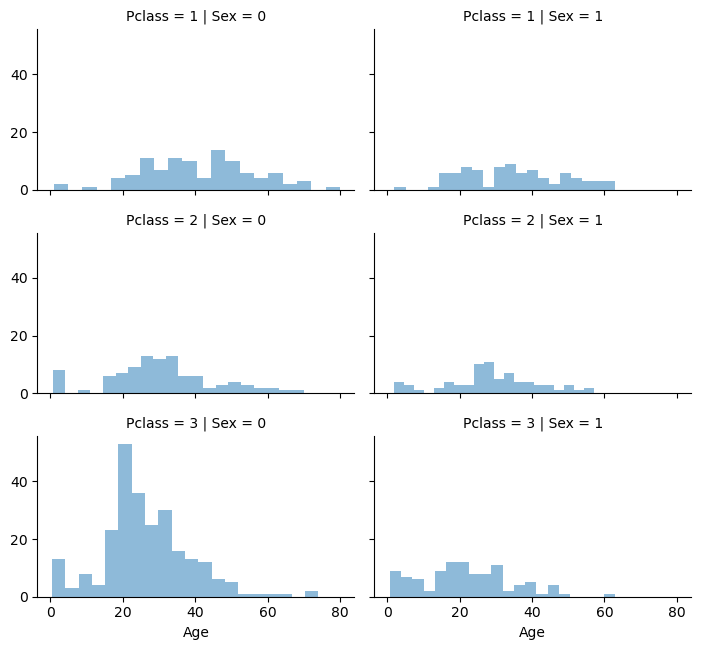

In [22]:
# age의 결측값 채우기(1) - pclass와 sex, age의 연관성 체크

grid = sns.FacetGrid(train_tic, row='Pclass',col='Sex',height=2.2,aspect=1.6)
grid.map(plt.hist, 'Age',alpha=.5,bins=20)
grid.add_legend()

# Pclass Sex Age 와의 결합이 2열 3행

In [23]:
guess_ages = np.zeros((2,3))
#print(dataset)
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            print(dataset[(dataset['Sex']==i)]['Age'])
            age_guess = guess_df.median()
            
            
            guess_ages[i,j] = int(age_guess/0.5 +0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1),'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train_tic.isnull().sum()

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64
0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64
0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64
1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Length: 314, dtype: float64
1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Length: 314, dtype: float64
1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Le

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [24]:
# age 변수를 범주형 변수로 채움

# 임의로 5개의 그룹을 만듦
train_tic['AgeBand'] = pd.cut(train_tic['Age'],5)
train_tic[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [25]:
# AgeBand를 바탕으로 Age를 변주형 변수로 바꿔준 후, AgeBand 변수는 제거

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_tic = train_tic.drop(['AgeBand'], axis=1)
combine = [train_tic, test_tic]
train_tic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 가족 동반 여부를 알 수 있는 새로운 변수 만들기

In [26]:
# SibSp와 Parch를 가족과의 동반여부를 알 수 있는 새로운 변수로 통합
# FamilySize = 1 : 가족과 동반하지 않았음을 의미
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_tic[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [27]:
# 1은 동반 X, 0은 동반했다는 새로운 변수 IsAlone을 생성

for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    
train_tic[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [28]:
train_tic = train_tic.drop(['Parch','SibSp','FamilySize'],axis=1)
test_tic = test_tic.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_tic, test_tic]
train_tic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [29]:
# Age 변수와 Pclass를 곱한 변수 생성

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_tic.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Ebmarked 의 결측값 처리

In [30]:
# 승선지(Ebmarked) 변수의 null값을 최빈값으로 대체 
freq_port = train_tic.Embarked.dropna().mode()[0]
freq_port

'S'

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_tic[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [32]:
# 승선지 변수를 범주형 변수로 바꿈

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
train_tic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Fare 변수의 결측값 처리

In [33]:
# 요금(Fare) 변수를 중앙값으로 대체

test_tic['Fare'].fillna(test_tic['Fare'].dropna().median(),inplace=True)
test_tic.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [34]:
# 요금(Fare) 을 숫자 범주형 변수로 바꿈

train_tic['FareBand'] = pd.qcut(train_tic['Fare'],4)
train_tic[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [35]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare'] > 31,'Fare']=3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_tic = train_tic.drop(['FareBand'],axis=1)
combine = [train_tic, test_tic]

train_tic.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [36]:
test_tic.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 모델 만들기 위한 데이터 준비

In [37]:
# 목적 변수 제거
X_train = train_tic.drop('Survived',axis=1)
# 목적 변수 역할
Y_train = train_tic['Survived']
# 예상 대상 데이터 셋
X_test = test_tic.drop("PassengerId",axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## 여러가지 모델을 통해 제일 좋은 모델 찾기

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

80.36

In [39]:
coeff_df = pd.DataFrame(train_tic.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

# 생존 여부 예측에 영향력이 큰 변수는 성별임

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


### SVC(Support Vector Machines)

In [40]:
import sklearn.svm as svm
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

78.23

In [41]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
submission.to_csv('titanic_predict1.csv',index=False)

## K-NN(K Nearest Neighberhood)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [46]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
submission.to_csv('titanic_predict2.csv',index=False)

## Gaussian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_gaussian = round(knn.score(X_train, Y_train) * 100, 2)
acc_gaussian

83.84

In [62]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
submission.to_csv('titanic_predict3.csv',index=False)

## Perceptron

In [64]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [65]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
submission.to_csv('titanic_predict4.csv',index=False)

## Linear SVC

In [70]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

79.12


C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
submission.to_csv('titanic_predict5.csv',index=False)

## Stochastic Gradient Descent

In [82]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.69

In [83]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
submission.to_csv('titanic_predict6.csv',index=False)

## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [86]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
submission.to_csv('titanic_predict7.csv',index=False)

## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [90]:
submission = pd.DataFrame({
        "PassengerId": test_tic["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [91]:
submission.to_csv('titanic_predict8.csv',index=False)

In [92]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,83.84
4,Naive Bayes,83.84
2,Logistic Regression,80.36
6,Stochastic Gradient Decent,79.69
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
